In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [3]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

In [5]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [4]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)

In [5]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

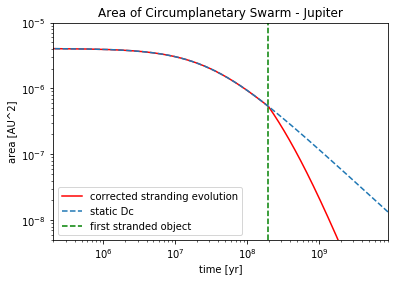

In [6]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [8]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

In [9]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 20)
num_distribution = []
for i in range(len(time_log)):
    jupiter_num.updateSwarm(time_log[i])
    num = []
    for j in range(len(drange)):
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)

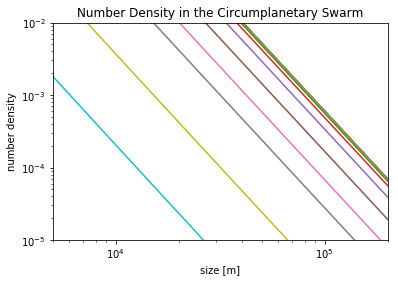

In [10]:
for i in range(len(num_distribution)):
    plt.loglog(drange, num_distribution[i])
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [2]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:210: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


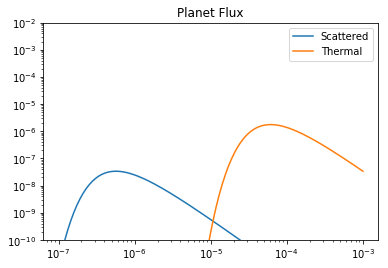

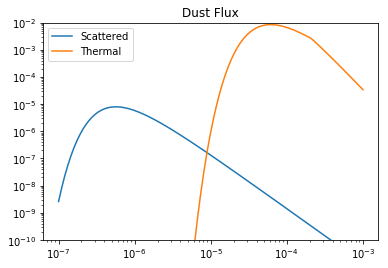

In [3]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [4]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

drange = linspace(0.01, 1.5e5, 2500)
#drange = logspace(2, 6, 1000)
time_log = logspace(6, 9.5, 10)
total_amount = []

# Testing
# num = []
#print(jupiter6.computeNtot(dlow=1000))
# for j in range(len(drange)):
#    num.append(jupiter6.computeNtot(dlow=drange[j]))
# total_amount.append(num)

for i in range(len(time_log)):
    jupiter6.updateSwarm2(time_log[i])
    num = []
    print(i)
    for d in drange:#j in range(len(drange)):
        Mt = jupiter6.swarm.Mtot(dlow=d, dhigh=Dmax)
        jupiter6.swarm.M0 = Mt
        #jupiter6.swarm.compute_kg_from_Mtot(Mt)
        #jupiter6.swarm.compute_ks_from_kg()
        #jupiter6.updateSwarm2(time_log[i], d)
        #print(jupiter6.swarm.M0)
        num.append(jupiter6.computeNtot(dlow=d)) #Make dhigh explicit
    total_amount.append(num)

0
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29478483479431.656
kg_val =  1859966565548.5474
lower =  0
upper =  55.66005410382848
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  65726.29613445378
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow <

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29478483479431.656
kg_val =  1859966565548.5474
lower =  0
upper =  9.205894527064135
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  114285.71666666665
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29559114713014.613
kg_val =  1865054052450.914
lower =  0
upper =  2371.854396780207
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  12064.835126050419
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow <

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

ks_val =  29639966493758.14
kg_val =  1870155454938.357
lower =  0
upper =  5.3170783165887405
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  125990.39775910362
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29639966493758.14
kg_val =  1870155454938.357
lower =  0
upper =  4.513165427927364
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  128871.55002801119
	

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29721039424915.438
kg_val =  1875270811073.5803
lower =  0
upper =  74.00539378593284
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  58823.535490196075
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29802334111389.746
kg_val =  1880400159023.3984
lower =  0
upper =  282.65834712755003
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  32773.117058823525
	 dlow

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29883851159738.914
kg_val =  1885543537059.024
lower =  0
upper =  6984.437772605656
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  7262.914677871148
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29883851159738.914
kg_val =  1885543537059.024
lower =  0
upper =  5909.821343653054
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29883851159738.914
kg_val =  1885543537059.024
lower =  0
upper =  23.376554705426475
str upper =  0.0
qg =  1.7
k_str =  5.666959192128794e+17
Dmax =  150000.0
Dc =  150000.0
dlow =  89915.97039215684
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow <

str upper =  2.2881879739616588e+16
qg =  1.7
k_str =  5.3232477438279226e+17
Dmax =  150000.0
Dc =  145596.70334515648
dlow =  6722.69862745098
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  30779998604632.355
kg_val =  1942086618268.2915
lower =  0
upper =  6390.320783785374
str upper =  2.2881879739616588e+16
qg =  1.7
k_str =  5.3232477438279226e+17
Dmax =  150000.0
Dc =  145596.70334515648
dlow =  7683.082717086834
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  45310557105307.04
kg_val =  2858902878808.2725
lower =  0
upper =  23.21957947959867
str upper =  1.4238978259374104e+17
qg =  1.7
k_str =  2.313553447167208e+17
Dmax =  150000.0
Dc =  97908.3134044591
dlow =  80312.1294957983
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  109115942180332.39
kg_val =  6884750511855.694
lower =  0
upper =  67496.69490434934
str upper =  1.0304243857482661e+17
qg =  1.7
k_str =  7.33687082648105e+16
Dmax =  150000.0
Dc =  56664.450520342194
dlow =  4561.834425770308
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlo

k_str =  7.33687082648105e+16
Dmax =  150000.0
Dc =  56664.450520342194
dlow =  74849.94498599439
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  471143439057495.1
kg_val =  29727141317698.336
lower =  0
upper =  8838255.194278395
str upper =  4.396672076474971e+16
qg =  1.7
k_str =  1.878595263603456e+16
Dmax =  150000.0
Dc =  29618.251726673778
dlow =  900.3700840336134
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlo

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  471143439057495.1
kg_val =  29727141317698.336
lower =  0
upper =  0
str upper =  1.6211691351070312e+16
qg =  1.7
k_str =  1.878595263603456e+16
Dmax =  150000.0
Dc =  29618.251726673778
dlow =  82472.99369747897
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow >

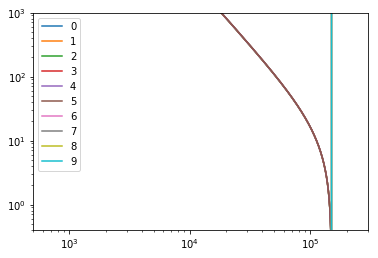

In [5]:
for i in range(len(total_amount)):
    plt.loglog(drange, total_amount[i], label=i)

plt.legend()
plt.ylim([4e-1, 1e3])
plt.xlim([5e2, 3e5])
plt.show()